# Regresión lineal múltiple
- ## Regresión con múltiples variables

Vamos a extender el ejercicio utilizando más de una variable de entrada para el modelo. Esto le da `mayor poder` al algoritmo de Machine Learning, pues de esta manera podremos obtener predicciones más complejas.

> Nuestra `ecuación de la recta` ahora pasara a ser:

$$Y = b + m1X1 + m2X2 + ... + m(n)X(n)$$


En nuestro caso, utilizaremos 2 `variables predictivas` para poder graficar en 3D, pero recordar que para mejores predicciones podemos utilizar más de 2 entradas y prescindir del gráfico.

In [1]:
# Librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Cargamos los datos de entrada
data = pd.read_csv('./data/articulos_ml.csv')

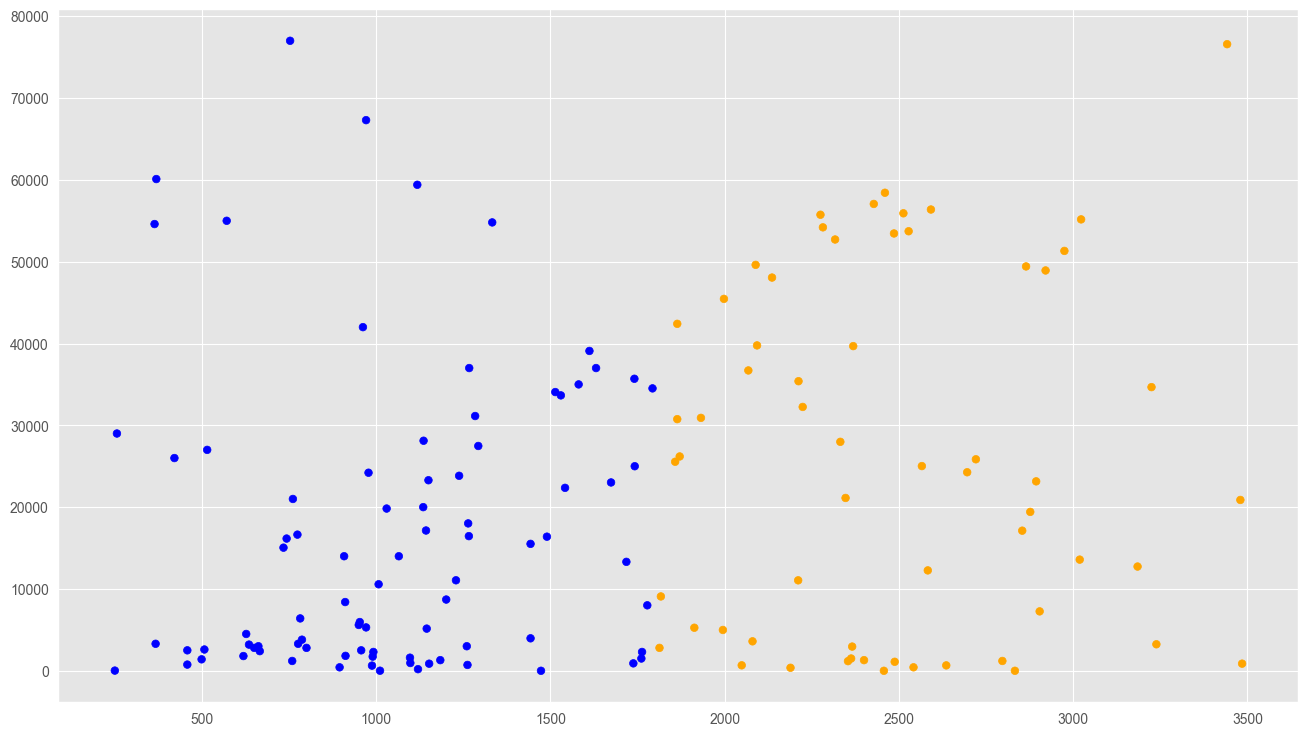

In [5]:
# En el eje X: entre 0 y 3.500
# En el eje Y: entre 0 y 80.000

data_filtered = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores = ['orange','blue']
tamanios = [30,60]

f1 = data_filtered['Word count'].values
f2 = data_filtered['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras.
asignar = [colores[0] if row['Word count'] > 1808  else colores[1] for index, row in data_filtered.iterrows()]
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [7]:
# Vamos a intentar mejorar el Modelo, con una dimensión más:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes

suma = (data_filtered['# of Links'] +
        data_filtered['# of comments'].fillna(0) +
        data_filtered['# Images video'])
dataX2 = pd.DataFrame()
dataX2['Word count'] = data_filtered['Word count']
dataX2['suma'] = suma
XY_train = np.array(dataX2)
z_train = data_filtered['# Shares'].values

Ya tenemos nuestras 2 variables de entrada XY_train y nuestra `variable de salida para ser "Y" a ser el eje "Z"`. Creamos un nuevo objeto de Regresión lineal con SKLearn, pero esta vez tendrá las dos dimensiones de entrenar: las que contienen `XY_train`. Al igual que antes, imprimimos los coeficientes y puntajes obtenidos.

In [8]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entramos el modelo, esta vez con 2 dimensiones
# obtendremos 2 coeficientes para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# El error cuadrático medio
print('Mean squared error: %.2f' % mean_squared_error(z_train, z_pred))
# El puntaje de varianza: 1 es perfecto
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


## Visualizar un plano en 3 dimensiones
Graficaremos nuestros puntos de las características de entrada en color azul y los puntos proyectados en el plano en color rojo.
Recordemos que en esta gráfica, el eje Z corresponde a la "altura" y representa la cantidad de Shares que obtendremos

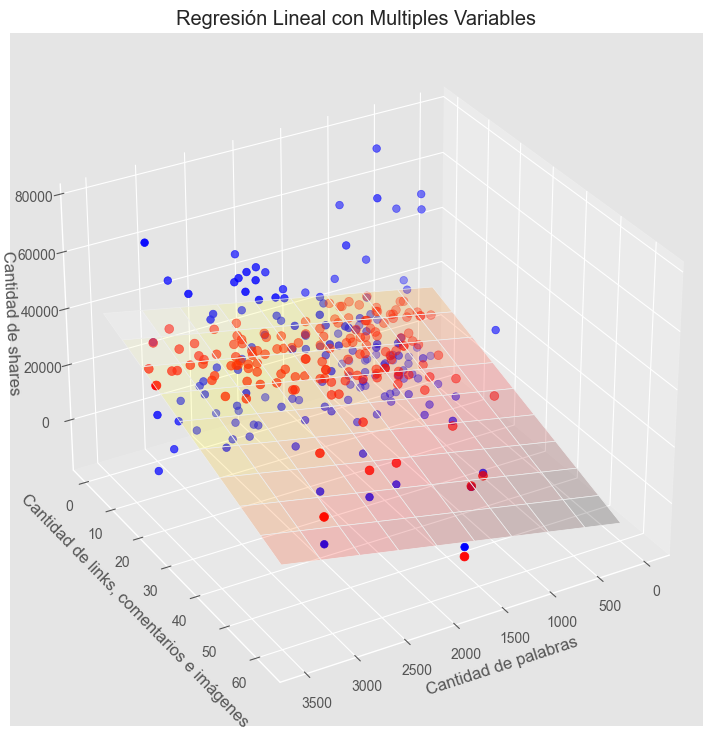

In [14]:
fig = plt.figure()
# Línea correcta
ax = fig.add_subplot(111, projection='3d')
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0,3500,num=10),np.linspace(0,60,num=10))

# Calculamos los nuevos valores de X e Y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

# Calculamos los correspondientes valores para Z. Debemos sumar el punto de intersección
z = nuevoX + nuevoY + regr2.intercept_

# Graficamos el plano
ax.plot_surface(xx,yy,z,alpha=0.2,cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:,0],XY_train[:,1],z_train,c='blue',s=30)

# Graficamos en rojo, los puntos
ax.scatter(XY_train[:,0],XY_train[:,1],z_pred,c='red',s=40)

# Con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30,azim=60)

ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Cantidad de links, comentarios e imágenes')
ax.set_zlabel('Cantidad de shares')
ax.set_title('Regresión Lineal con Multiples Variables')
plt.show()

Podemos rotar el gráfico para apreciar el plano desde diversos ángulos modificando el valor del parámetro `azim` en view_init números de 0 a 360.

### Predicción con el modelo de Múltiples Variables
Veamos ahora, que predicción tendremos para un artículo de 2000 palabras, con 10 enlaces, 4 comentarios y 6 imágenes.

In [18]:
# Si quiero predecir cuantos "Shares" voy a obtener por un artículo con:
# 2000 palabras, 10 enlaces, 4 comentarios y 6 imagenes

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print("Predicción de Shares para un artículo de 2000 palabras, 10 enlaces, 4 comentarios y 6 imágenes: ", z_Dosmil[0])
print("Con un error cuadrático medio de: %.2f" % mean_squared_error(z_train, z_pred))
print("Y un puntaje de varianza de: %.2f" % r2_score(z_train, z_pred))

Predicción de Shares para un artículo de 2000 palabras, 10 enlaces, 4 comentarios y 6 imágenes:  20518.066824396697
Con un error cuadrático medio de: 352122816.48
Y un puntaje de varianza de: 0.11
